In [10]:
from scipy import fftpack
from scipy import signal
import scipy.io.wavfile
from scipy import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl


In [11]:
# Relay feedback data import
with open("relay_feedback.csv") as relay_data:
    r_data=pd.read_csv(relay_data, header=None)
r_data.columns=["time","controller_output"]

In [12]:
N = len(r_data["controller_output"]) #Number of samples
f_t=r_data["controller_output"].to_numpy()
t=r_data["time"].to_numpy()

In [13]:
"""Hann window and FFT"""
f_tHann=(np.hanning(N)*f_t)
F = fftpack.fft(f_tHann)
f = fftpack.fftfreq(N, d=t[1]-t[0]) #contains the frequencies corresponding to each frequency bin.
mask = np.where(f >= 0) #Extracts the frequencies of interest

In [14]:
F_filtered = F*(abs(f) <= 0.1) #Low pass filter to remove frequencies above 0.1Hz
f_t_filtered = fftpack.ifft(F_filtered)

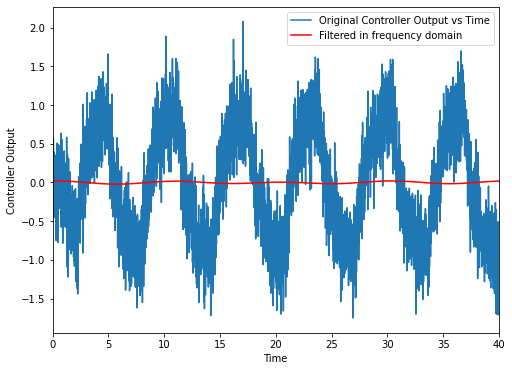

In [15]:
# Compare Original controller output to filtered output

# fig = plt.figure(figsize=(8, 6))
# ax = plt.subplot()
# ax.plot(t, f_t, label="Original Controller Output vs Time" )
# ax.plot(t, f_tHann, 'r', lw=2, label='Windowed data',alpha=0.7)
# ax.set_ylabel("Controller Output")
# ax.set_xlabel("Time")
# ax.set_xlim(0, 40)
# ax.legend(loc=0)


# fig = plt.figure(figsize=(8, 6))
# ax = plt.subplot()
# ax.plot(f[mask], np.log(abs(F[mask])), label="FFT")
# ax.set_title("Amplitude vs Frequency Graph")
# ax.set_ylabel("Amplitude")
# ax.set_xlabel("Frequency(Hz)")


fig = plt.figure(figsize=(8, 6))
ax = plt.subplot()
ax.plot(t, f_t, label="Original Controller Output vs Time" )
ax.plot(t, f_t_filtered.real, 'r', label='Filtered in frequency domain')
ax.set_ylabel("Controller Output")
ax.set_xlabel("Time")
ax.set_xlim(0, 40)
ax.legend(loc=0)

plt.show()

Text(0.5, 0, 'Frequency(Hz)')

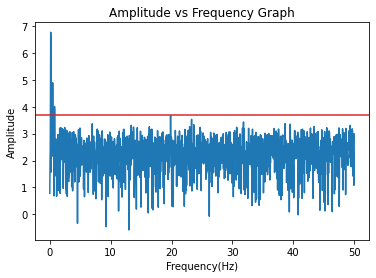

In [16]:
# Plot Amplitude vs Frequency
plt.plot(f[mask], np.log(abs(F[mask])), label="FFT")
plt.axhline(y=3.7, color='#d62728')
plt.title("Amplitude vs Frequency Graph")
plt.ylabel("Amplitude")
plt.xlabel("Frequency(Hz)")
# plt.xlim(0,5)


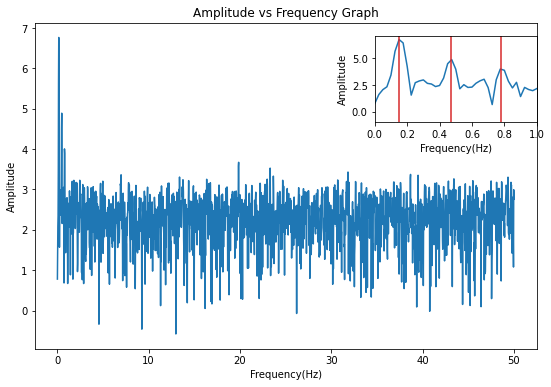

In [18]:
# Find the dominant frequencies
fig, ax1 = plt.subplots()
fig.set_size_inches([9,6])

ax1.plot(f[mask], np.log(abs(F[mask])), label="FFT")
ax1.set_title("Amplitude vs Frequency Graph")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Frequency(Hz)")


left, bottom, width, height = [0.65, 0.65, 0.25, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(f[mask], np.log(abs(F[mask])), label="FFT")
ax2.axvline(0.15, color='#d62728')
ax2.axvline(0.47, color='#d62728')
ax2.axvline(0.78, color='#d62728')
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequency(Hz)")
ax2.set_xlim(0,1)



plt.show()
